# Multi-Linear Regression

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline
from sklearn.model_selection import train_test_split

In [21]:
df = pd.read_csv('./Occupancy_Estimation.csv')

X_train, X_test = train_test_split(df, test_size=0.2)

In [32]:
possible = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 
            'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']

base_formula = "Room_Occupancy_Count ~ "
fixed_features = []
adjusted_train_R_squared = []
models = []

number_of_features = 5

for k in range(number_of_features):
    best = ["", 0, "", None]
    
    for factor in possible:
        formula = base_formula + ("" if k == 0 else "+ ") + factor
        model = smf.ols(formula=formula, data=X_train).fit()
        if(model.rsquared_adj > best[1]):
            best = [factor, model.rsquared_adj, formula, model]
    
    fixed_features.append(best[0])
    possible.remove(best[0])
    adjusted_train_R_squared.append(best[1])
    base_formula = best[2] + " "
    models.append(best[3])

print(base_formula)

Room_Occupancy_Count ~ S1_Light + S7_PIR + S5_CO2_Slope + S5_CO2 + S3_Temp 


In [23]:
# Print model summary for best 5-feature model
models[4].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Room_Occupancy_Count   R-squared:                       0.868
Model:                              OLS   Adj. R-squared:                  0.868
Method:                   Least Squares   F-statistic:                 1.069e+04
Date:                  Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                          21:40:45   Log-Likelihood:                -2372.9
No. Observations:                  8103   AIC:                             4758.
Df Residuals:                      8097   BIC:                             4800.
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -7.3345      0.370    -19.839      0.000      -8.059      -6.610
S1_Light         0.0070      0.000     63.408      0.000       0.007       0.007
S7_PIR           0.6388      0.017     37.105      0.000       0.605       0.673
S5_CO2_Slope     0.2222      0.004     55.960      0.000       0.214       0.230
S5_CO2           0.0009   3.36e-05     26.241      0.000       0.001       0.001
S3_Temp          0.2833      0.015     18.655      0.000       0.254       0.313
==============================================================================
Omnibus:                     5041.870   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           128766.537
Skew:                           2.544   Prob(JB):                         0.00
Kurtosis:                      21.855   Cond. No.                     5.18e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.18e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Training Adjusted R-squared [0.7255286660189203, 0.7979432523423371, 0.8198848148933788, 0.862767763680678, 0.8684068894401512]
Testing Adjusted R-squared [0.7018829302859649, 0.7958624172073949, 0.820691119747106, 0.8611020977526147, 0.8674724894979202]


Text(0, 0.5, 'Adjusted R-squared')

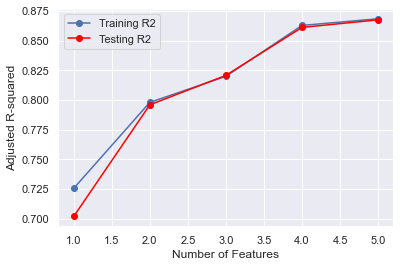

In [26]:
training_errors = []
testing_errors = []
training_residuals = []
testing_residuals = []
adjusted_test_R_squared = []

# Calculate sample size and mean
N = len(X_test["Room_Occupancy_Count"])
average = np.mean(X_test["Room_Occupancy_Count"])

# Calculate the Total Sum of Squares
TSS = sum([(i-average)**2 for i in X_test["Room_Occupancy_Count"]])

for i in range(len(models)):
    # Calculate prediction error for each model
    training_errors.append(X_train["Room_Occupancy_Count"] - models[i].predict(X_train))
    testing_errors.append(X_test["Room_Occupancy_Count"] - models[i].predict(X_test))

    # Calculate the Residuals Sum of Squares
    training_residuals.append(sum([j**2 for j in training_errors[i]]))
    testing_residuals.append(sum([j**2 for j in testing_errors[i]]))

    # Calculate Test R-Squared
    # Training R-squared is given by model and was already stored during model selection
    adjusted_test_R_squared.append(1 - (testing_residuals[i]/TSS) * (N-1)/(N-i))


print("Training Adjusted R-squared", adjusted_train_R_squared)
print("Testing Adjusted R-squared", adjusted_test_R_squared)

# Plot Adjusted R-squared values for training and testing datasets
predictors = [1, 2, 3, 4, 5]
fig, ax = plt.subplots()
ax.plot(predictors, adjusted_train_R_squared, "o-", label="Training R2")
ax.plot(predictors, adjusted_test_R_squared, "o-", label="Testing R2", color="red")
ax.legend(loc="best")
ax.set_xlabel('Number of Features')
ax.set_ylabel('Adjusted R-squared')

Training Residuals Sum of Squares [1778.2992445278667, 1308.9636786765755, 1166.6778334290639, 888.7981291592545, 852.1705291394842]
Testing Residuals Sum of Squares [479.41641359198456, 328.1214404561342, 288.07058899300716, 223.0376514610341, 212.70309296063724]


Text(0, 0.5, 'Residuals Sum of Squares')

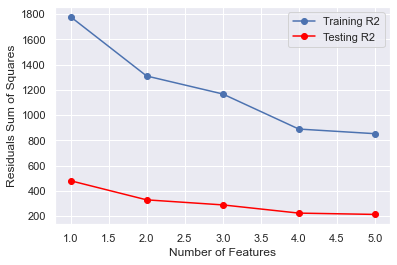

In [27]:
print("Training Residuals Sum of Squares", training_residuals)
print("Testing Residuals Sum of Squares", testing_residuals)

fig, ax = plt.subplots()
ax.plot(predictors, training_residuals, "o-", label="Training R2")
ax.plot(predictors, testing_residuals, "o-", label="Testing R2", color="red")
ax.legend(loc="best")

ax.set_xlabel('Number of Features')
ax.set_ylabel('Residuals Sum of Squares')

## Multi-linear Regression with Interactions

In [38]:
formula = "Room_Occupancy_Count ~ S1_Light * S7_PIR * S5_CO2_Slope * S5_CO2 * S3_Temp"
interaction_model = smf.ols(formula=formula, data=X_train).fit()
interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Room_Occupancy_Count   R-squared:                       0.932
Model:                              OLS   Adj. R-squared:                  0.932
Method:                   Least Squares   F-statistic:                     3563.
Date:                  Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                          21:56:29   Log-Likelihood:                 293.82
No. Observations:                  8103   AIC:                            -523.6
Df Residuals:                      8071   BIC:                            -299.6
Df Model:                            31                                         
Covariance Type:              nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                     -16.1955      1.487    -10.890      0.000     -19.111     -13.280
S1_Light                                        0.0715      0.020      3.632      0.000       0.033       0.110
S7_PIR                                        -53.7727     19.580     -2.746      0.006     -92.154     -15.392
S1_Light:S7_PIR                                 0.5043      0.145      3.474      0.001       0.220       0.789
S5_CO2_Slope                                  -27.8348      1.348    -20.647      0.000     -30.477     -25.192
S1_Light:S5_CO2_Slope                           0.1667      0.017      9.806      0.000       0.133       0.200
S7_PIR:S5_CO2_Slope                            -2.0947     15.909     -0.132      0.895     -33.280      29.091
S1_Light:S7_PIR:S5_CO2_Slope                   -0.0991      0.110     -0.903      0.367      -0.314       0.116
S5_CO2                                          0.0341      0.004      8.115      0.000       0.026       0.042
S1_Light:S5_CO2                                -0.0001   4.62e-05     -2.705      0.007      -0.000   -3.44e-05
S7_PIR:S5_CO2                                  -0.0739      0.028     -2.624      0.009      -0.129      -0.019
S1_Light:S7_PIR:S5_CO2                          0.0004      0.000      2.108      0.035    2.97e-05       0.001
S5_CO2_Slope:S5_CO2                             0.0218      0.002      9.374      0.000       0.017       0.026
S1_Light:S5_CO2_Slope:S5_CO2                   -0.0001    2.8e-05     -4.252      0.000      -0.000   -6.42e-05
S7_PIR:S5_CO2_Slope:S5_CO2                      0.0428      0.026      1.623      0.105      -0.009       0.095
S1_Light:S7_PIR:S5_CO2_Slope:S5_CO2            -0.0002      0.000     -1.036      0.300      -0.001       0.000
S3_Temp                                         0.6317      0.058     10.942      0.000       0.518       0.745
S1_Light:S3_Temp                               -0.0027      0.001     -3.523      0.000      -0.004      -0.001
S7_PIR:S3_Temp                                  2.3602      0.767      3.076      0.002       0.856       3.864
S1_Light:S7_PIR:S3_Temp                        -0.0214      0.006     -3.762      0.000      -0.033      -0.010
S5_CO2_Slope:S3_Temp                            1.1161      0.053     21.154      0.000       1.013       1.220
S1_Light:S5_CO2_Slope:S3_Temp                  -0.0067      0.001    -10.088      0.000      -0.008      -0.005
S7_PIR:S5_CO2_Slope:S3_Temp                     0.0282      0.621      0.045      0.964      -1.188       1.245
S1_Light:S7_PIR:S5_CO2_Slope:S3_Temp            0.0042      0.004      0.992      0.321      -0.004       0.013
S5_CO2:S3_Temp                       

In [39]:
interaction_training_error = X_train["Room_Occupancy_Count"] - interaction_model.predict(X_train)
interaction_testing_errors = X_test["Room_Occupancy_Count"] - interaction_model.predict(X_test)

# Calculate the Residuals Sum of Squares
interaction_training_residuals = sum([j**2 for j in interaction_training_error])
interaction_testing_residuals = sum([j**2 for j in interaction_testing_errors])

# Calculate Test R-Squared
# Training R-squared is given by model and was already stored during model selection
interaction_adjusted_test_R_squared = (1 - (interaction_testing_residuals/TSS) * (N-1)/(N-31))

print("Training Adjusted R-squared", interaction_model.rsquared_adj)
print("Testing Adjusted R-squared", interaction_adjusted_test_R_squared)
print("Training Residuals Sum of Squares", interaction_training_residuals)
print("Testing Residuals Sum of Squares", interaction_testing_residuals)

Training Adjusted R-squared 0.9316435819316932
Testing Adjusted R-squared 0.9111130076555074
Training Residuals Sum of Squares 441.24100319073307
Testing Residuals Sum of Squares 140.75626209567946


In [44]:
# S1_Light:S5_CO2_Slope:S5_CO2:S3_Temp
# S1_Light:S7_PIR:S3_Temp
# S5_CO2_Slope:S5_CO2:S3_Temp
# S7_PIR:S5_CO2:S3_Temp

S7_PIR:S5_CO2	-0.0084	0.007	-1.283	0.200	-0.021	0.004
S7_PIR:S5_CO2:S3_Temp

formula =  "Room_Occupancy_Count ~ "
formula += "S1_Light * S5_CO2_Slope * S5_CO2 * S3_Temp + "
formula += "S1_Light * S7_PIR * S3_Temp + "
formula += "S5_CO2_Slope * S5_CO2 * S3_Temp + "
formula += "S7_PIR * S5_CO2 * S3_Temp"
reduced_interaction_model = smf.ols(formula=formula, data=X_train).fit()
reduced_interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Room_Occupancy_Count   R-squared:                       0.928
Model:                              OLS   Adj. R-squared:                  0.928
Method:                   Least Squares   F-statistic:                     4957.
Date:                  Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                          22:13:03   Log-Likelihood:                 65.439
No. Observations:                  8103   AIC:                            -86.88
Df Residuals:                      8081   BIC:                             67.12
Df Model:                            21                                         
Covariance Type:              nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -16.0686      1.488    -10.802      0.000     -18.984     -13.153
S1_Light                                 0.0668      0.018      3.695      0.000       0.031       0.102
S5_CO2_Slope                           -28.3579      1.353    -20.955      0.000     -31.011     -25.705
S1_Light:S5_CO2_Slope                    0.1742      0.014     12.601      0.000       0.147       0.201
S5_CO2                                   0.0323      0.004      7.687      0.000       0.024       0.041
S1_Light:S5_CO2                       -4.69e-05   4.05e-05     -1.158      0.247      -0.000    3.25e-05
S5_CO2_Slope:S5_CO2                      0.0204      0.002      8.724      0.000       0.016       0.025
S1_Light:S5_CO2_Slope:S5_CO2            -0.0001   2.03e-05     -6.413      0.000      -0.000   -9.04e-05
S3_Temp                                  0.6287      0.058     10.885      0.000       0.515       0.742
S1_Light:S3_Temp                        -0.0026      0.001     -3.663      0.000      -0.004      -0.001
S5_CO2_Slope:S3_Temp                     1.1381      0.053     21.500      0.000       1.034       1.242
S1_Light:S5_CO2_Slope:S3_Temp           -0.0070      0.001    -12.905      0.000      -0.008      -0.006
S5_CO2:S3_Temp                          -0.0012      0.000     -7.674      0.000      -0.002      -0.001
S1_Light:S5_CO2:S3_Temp               2.463e-06   1.57e-06      1.574      0.116   -6.05e-07    5.53e-06
S5_CO2_Slope:S5_CO2:S3_Temp             -0.0008   9.07e-05     -9.115      0.000      -0.001      -0.001
S1_Light:S5_CO2_Slope:S5_CO2:S3_Temp  5.299e-06   7.89e-07      6.717      0.000    3.75e-06    6.85e-06
S7_PIR                                  67.9323      5.238     12.970      0.000      57.665      78.199
S1_Light:S7_PIR                         -0.4606      0.032    -14.310      0.000      -0.524      -0.398
S7_PIR:S3_Temp                          -2.5578      0.205    -12.456      0.000      -2.960      -2.155
S1_Light:S7_PIR:S3_Temp                  0.0176      0.001     14.044      0.000       0.015       0.020
S7_PIR:S5_CO2                           -0.0084      0.007     -1.283      0.200      -0.021       0.004
S7_PIR:S5_CO2:S3_Temp                    0.0003      0.000      1.138      0.255      -0.000       0.001
==============================================================================
Omnibus:                     6865.114   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           505667.513
Skew:                           3.637   Prob(JB):                         0.00
Kurtosis:                      41.011   Cond. No.                     5.10e+09
=========================================

In [49]:
reduced_interaction_training_error = X_train["Room_Occupancy_Count"] - reduced_interaction_model.predict(X_train)
reduced_interaction_testing_errors = X_test["Room_Occupancy_Count"] - reduced_interaction_model.predict(X_test)

# Calculate the Residuals Sum of Squares
reduced_interaction_training_residuals = sum([j**2 for j in reduced_interaction_training_error])
reduced_interaction_testing_residuals = sum([j**2 for j in reduced_interaction_testing_errors])

# Calculate Test R-Squared
# Training R-squared is given by model and was already stored during model selection
reduced_interaction_adjusted_test_R_squared = (1 - (reduced_interaction_testing_residuals/TSS) * (N-1)/(N-31))

print("Training Adjusted R-squared", reduced_interaction_model.rsquared_adj)
print("Testing Adjusted R-squared", reduced_interaction_adjusted_test_R_squared)
print("Training Residuals Sum of Squares", reduced_interaction_training_residuals)
print("Testing Residuals Sum of Squares", reduced_interaction_testing_residuals)

Training Adjusted R-squared 0.9188843001880028
Testing Adjusted R-squared 0.9140574929502308
Training Residuals Sum of Squares 524.7699687355889
Testing Residuals Sum of Squares 136.0935467427435


In [46]:
# S1_Light:S5_CO2_Slope:S5_CO2:S3_Temp
# S1_Light:S7_PIR:S3_Temp
# S5_CO2_Slope:S5_CO2:S3_Temp
# S7_PIR:S3_Temp

formula =  "Room_Occupancy_Count ~ "
formula += "S1_Light * S5_CO2_Slope * S5_CO2 * S3_Temp + "
formula += "S1_Light * S7_PIR * S3_Temp + "
formula += "S5_CO2_Slope * S5_CO2 * S3_Temp + "
formula += "S7_PIR * S3_Temp"
reduced_interaction_model = smf.ols(formula=formula, data=X_train).fit()
reduced_interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Room_Occupancy_Count   R-squared:                       0.927
Model:                              OLS   Adj. R-squared:                  0.927
Method:                   Least Squares   F-statistic:                     5432.
Date:                  Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                          22:19:33   Log-Likelihood:                 32.770
No. Observations:                  8103   AIC:                            -25.54
Df Residuals:                      8083   BIC:                             114.5
Df Model:                            19                                         
Covariance Type:              nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                              -15.6949      1.487    -10.558      0.000     -18.609     -12.781
S1_Light                                 0.0430      0.017      2.469      0.014       0.009       0.077
S5_CO2_Slope                           -28.2486      1.358    -20.799      0.000     -30.911     -25.586
S1_Light:S5_CO2_Slope                    0.1686      0.014     12.336      0.000       0.142       0.195
S5_CO2                                   0.0313      0.004      7.462      0.000       0.023       0.040
S1_Light:S5_CO2                      -3.048e-05   3.96e-05     -0.769      0.442      -0.000    4.72e-05
S5_CO2_Slope:S5_CO2                      0.0199      0.002      8.474      0.000       0.015       0.024
S1_Light:S5_CO2_Slope:S5_CO2            -0.0001   2.02e-05     -6.529      0.000      -0.000   -9.21e-05
S3_Temp                                  0.6144      0.058     10.643      0.000       0.501       0.728
S1_Light:S3_Temp                        -0.0016      0.001     -2.389      0.017      -0.003      -0.000
S5_CO2_Slope:S3_Temp                     1.1340      0.053     21.347      0.000       1.030       1.238
S1_Light:S5_CO2_Slope:S3_Temp           -0.0068      0.001    -12.617      0.000      -0.008      -0.006
S5_CO2:S3_Temp                          -0.0012      0.000     -7.452      0.000      -0.002      -0.001
S1_Light:S5_CO2:S3_Temp               1.782e-06   1.53e-06      1.164      0.245   -1.22e-06    4.78e-06
S5_CO2_Slope:S5_CO2:S3_Temp             -0.0008   9.09e-05     -8.869      0.000      -0.001      -0.001
S1_Light:S5_CO2_Slope:S5_CO2:S3_Temp  5.337e-06   7.83e-07      6.813      0.000     3.8e-06    6.87e-06
S7_PIR                                  90.9906      4.035     22.550      0.000      83.081      98.900
S1_Light:S7_PIR                         -0.5550      0.028    -19.616      0.000      -0.610      -0.500
S7_PIR:S3_Temp                          -3.4794      0.157    -22.096      0.000      -3.788      -3.171
S1_Light:S7_PIR:S3_Temp                  0.0212      0.001     19.218      0.000       0.019       0.023
==============================================================================
Omnibus:                     6704.653   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           515124.445
Skew:                           3.481   Prob(JB):                         0.00
Kurtosis:                      41.435   Cond. No.                     3.92e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+09. This might indicate that th

In [51]:
# Only level two interactions

formula =  "Room_Occupancy_Count ~ "
formula += "S1_Light * S7_PIR + "
formula += "S1_Light * S5_CO2_Slope + "
formula += "S1_Light * S5_CO2 + "
formula += "S1_Light * S3_Temp + "

formula += "S7_PIR * S5_CO2_Slope + "
formula += "S7_PIR * S7_PIR + "
formula += "S7_PIR * S7_PIR + "

formula += "S5_CO2_Slope * S5_CO2 + "
formula += "S5_CO2_Slope * S3_Temp + "

formula += "S5_CO2 * S3_Temp"

reduced_interaction_model = smf.ols(formula=formula, data=X_train).fit()
reduced_interaction_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Room_Occupancy_Count   R-squared:                       0.919
Model:                              OLS   Adj. R-squared:                  0.919
Method:                   Least Squares   F-statistic:                     7061.
Date:                  Thu, 27 Apr 2023   Prob (F-statistic):               0.00
Time:                          22:26:25   Log-Likelihood:                -408.58
No. Observations:                  8103   AIC:                             845.2
Df Residuals:                      8089   BIC:                             943.2
Df Model:                            13                                         
Covariance Type:              nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -17.3526      0.839    -20.688      0.000     -18.997     -15.708
S1_Light                  0.0949      0.008     11.772      0.000       0.079       0.111
S7_PIR                    1.8091      0.034     53.426      0.000       1.743       1.876
S1_Light:S7_PIR          -0.0119      0.000    -49.415      0.000      -0.012      -0.011
S5_CO2_Slope            -11.1835      0.451    -24.797      0.000     -12.068     -10.299
S1_Light:S5_CO2_Slope    -0.0006   5.67e-05    -11.241      0.000      -0.001      -0.001
S5_CO2                    0.0337      0.002     15.119      0.000       0.029       0.038
S1_Light:S5_CO2        2.151e-05   5.98e-07     35.963      0.000    2.03e-05    2.27e-05
S3_Temp                   0.6833      0.033     20.786      0.000       0.619       0.748
S1_Light:S3_Temp         -0.0038      0.000    -11.694      0.000      -0.004      -0.003
S7_PIR:S5_CO2_Slope       0.0605      0.009      6.650      0.000       0.043       0.078
S5_CO2_Slope:S5_CO2      -0.0007   2.32e-05    -28.182      0.000      -0.001      -0.001
S5_CO2_Slope:S3_Temp      0.4617      0.018     25.531      0.000       0.426       0.497
S5_CO2:S3_Temp           -0.0013   8.66e-05    -15.177      0.000      -0.001      -0.001
==============================================================================
Omnibus:                     6748.914   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           466495.815
Skew:                           3.558   Prob(JB):                         0.00
Kurtosis:                      39.484   Cond. No.                     1.35e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.35e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""